In [27]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

Для начала возьмем T > 0.5 и убедимся в наличии разрыва

In [28]:
A = 0; B = 1; T = 1        # границы
h = 0.01; tau = 0.0025     # размеры шага по времени и координате
M = int ((B-A)/h)          # количество узлов по координате
N = int(T / tau)              # количество узлов по времени
u1 = np.linspace(A, B, M+1)
u2 = np.linspace(0,0,M+1)
x = np.linspace(A, B, M+1)
nu = 0

In [29]:
cou1 = np.abs(u1).max() * tau / h
cou2 = nu * tau / h**2
print 'Hyperbolic Courant:', cou1, 'Parabolic Courant:', cou2

Hyperbolic Courant: 0.25 Parabolic Courant: 0.0


In [30]:
u1[0] = u1[M] = 0

In [31]:
def u00(x):
    return (2*x - 1)*(abs(2*x - 1) - 1)

In [32]:
for i in range(1, M):
    u1[i] = u00(u1[i])

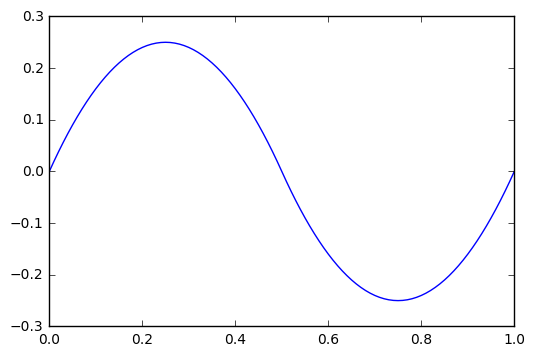

In [34]:
plt.plot(x, u1)

In [35]:
u0 = u1.copy()
u3 = u1.copy()
u4 = u1.copy()

In [36]:
for i in range(N):
    for j in range(1, M):
        d1 = abs(u1[j] + u1[j - 1]) / 2
        d2 = abs(u1[j] + u1[j + 1]) / 2
        val1 = (u1[j-1]**2-u1[j+1]**2)/(4*h)
        val2 = (d2*(u1[j+1]-u1[j])-d1*(u1[j]-u1[j-1]))/(2*h)
        val3 = nu*(u1[j+1]-2*u1[j]+u1[j-1])/(h**2)
        u2[j] = u1[j] + tau * (val1 + val2 + val3)
    u2,u1 = u1,u2

In [37]:
for i in range(N):
    for j in range(1, M):
        p1 = ((u3[j]) ** 2 - (u3[j+1]) ** 2) * tau / 4 / h + 0.5 * (u3[j+1] + u3[j])
        p2 = ((u3[j-1]) ** 2 - (u3[j]) ** 2) * tau / 4 / h + 0.5 * (u3[j] + u3[j-1])
        u2[j] = u3[j] + nu*tau / (h ** 2) * (u3[j+1] - 2 * u3[j] + u3[j-1]) - tau / (h * 2) * (p1 ** 2 - p2 ** 2)
    u2, u3 = u3, u2

In [38]:
def x1(x, t):
    if x <= 0.5:
        return (1+2*t-(1 + 4*t*(1+t-4*x))**(0.5))/(8*t)
    else:
        return (6*t-1 +(1 + 4*t*(t-3+4*x))**(0.5))/(8*t)

In [39]:
for i in range(1, M):
    u4[i] = u00(x1(i*h, T))

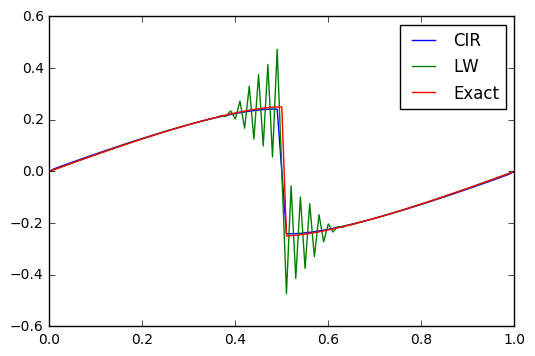

In [40]:
#plt.plot(x, u0)
plt.plot(x, u1, label='CIR')
plt.plot(x, u3, label='LW')
plt.plot(x, u4, label='Exact')
plt.legend(loc='best')

Теперь возьмем T = 0.5

In [41]:
T = 0.5
tau = 0.0025     # размеры шага по времени 
N = int(T / tau)              # количество узлов по времени
u1 = np.linspace(A, B, M+1)
u2 = np.linspace(0,0,M+1)
x = np.linspace(A, B, M+1)

In [42]:
cou1 = np.abs(u1).max() * tau / h
cou2 = nu * tau / h**2
print 'Hyperbolic Courant:', cou1, 'Parabolic Courant:', cou2

Hyperbolic Courant: 0.25 Parabolic Courant: 0.0


In [43]:
u1[0] = u1[M] = 0
for i in range(1, M):
    u1[i] = u00(u1[i])

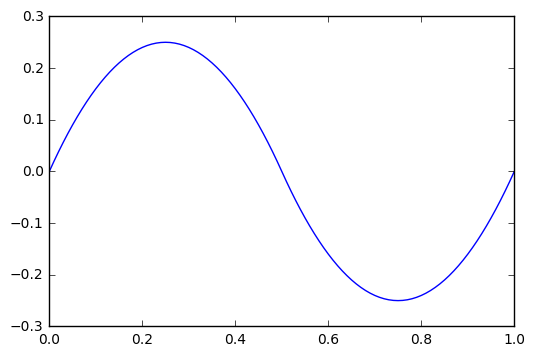

In [44]:
plt.plot(x, u1)

In [45]:
u0 = u1.copy()
u3 = u1.copy()
u4 = u1.copy()

In [46]:
for i in range(N):
    for j in range(1, M):
        d1 = abs(u1[j] + u1[j - 1]) / 2
        d2 = abs(u1[j] + u1[j + 1]) / 2
        val1 = (u1[j-1]**2-u1[j+1]**2)/(4*h)
        val2 = (d2*(u1[j+1]-u1[j])-d1*(u1[j]-u1[j-1]))/(2*h)
        val3 = nu*(u1[j+1]-2*u1[j]+u1[j-1])/(h**2)
        u2[j] = u1[j] + tau * (val1 + val2 + val3)
    u2,u1 = u1,u2

In [47]:
for i in range(N):
    for j in range(1, M):
        p1 = ((u3[j]) ** 2 - (u3[j+1]) ** 2) * tau / 4 / h + 0.5 * (u3[j+1] + u3[j])
        p2 = ((u3[j-1]) ** 2 - (u3[j]) ** 2) * tau / 4 / h + 0.5 * (u3[j] + u3[j-1])
        u2[j] = u3[j] + nu*tau / (h ** 2) * (u3[j+1] - 2 * u3[j] + u3[j-1]) - tau / (h * 2) * (p1 ** 2 - p2 ** 2)
    u2, u3 = u3, u2

In [48]:
for i in range(1, M):
    u4[i] = u00(x1(i*h, T))

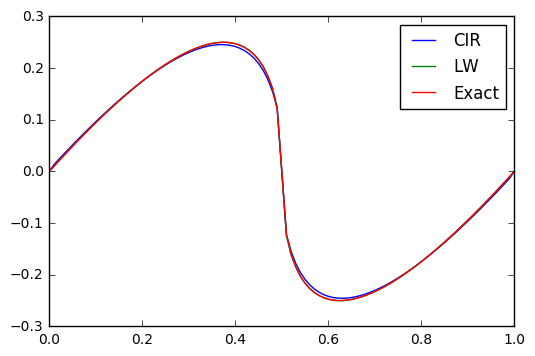

In [49]:
#plt.plot(x, u0)
plt.plot(x, u1, label='CIR')
plt.plot(x, u3, label='LW')
plt.plot(x, u4, label='Exact')
plt.legend(loc='best')